### Quiero leer los datos 2MRSxWISE_VLS.txt y dividir entre faint (-23.2 < M_K_s < -22) y bright (-26 < M_K_s < -23.2)

In [1]:
from astropy.io import ascii

filename = '../data/VLS/2MRSxWISE_VLS.txt'
data = ascii.read(filename)
print(data)

 _RAJ2000  _DEJ2000 Kcmag  Hcmag  Jcmag  ... W1mag  W2mag  W3mag  class
--------- --------- ------ ------ ------ ... ------ ------ ------ -----
189.99789 -11.62307  4.991  5.228  5.897 ...  7.227  7.215  6.317     3
192.72145  41.12015  5.163  5.408  6.068 ...  6.664  6.659  4.322     3
187.44499   8.00041  5.498  5.732   6.37 ...   7.88  7.895  7.275     3
198.95554  42.02929  5.722  5.947  6.682 ...   8.35  8.307  5.845     3
 190.9167  11.55261  5.816  6.064   6.74 ...  7.857  7.892  7.137     3
  49.3275 -41.10807  5.847  6.093  6.731 ...  7.678  7.693  6.637     3
166.45247   -0.0359  5.848  6.094  6.781 ...  7.961  7.912  5.963     3
187.70593   12.3911  5.896  6.144  6.806 ...  8.214  8.147  6.933     3
151.30824  -7.71858  5.921  6.148   6.81 ...  7.313  7.343  6.628     3
339.26709  34.41592  6.081  6.332  7.077 ...  7.858  7.815  6.522     3
      ...       ...    ...    ...    ... ...    ...    ...    ...   ...
271.98587 -58.71849 11.582 11.824 12.376 ... 12.467 12.447  8.74

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord
c = SkyCoord(data['_RAJ2000']*u.degree,data['_DEJ2000']*u.degree,frame='icrs')
c.ra.wrap_at(180*u.degree)

<Longitude [-170.00211, -167.27855, -172.55501, ...,  152.27705,
              39.49355,  -71.07852] deg>

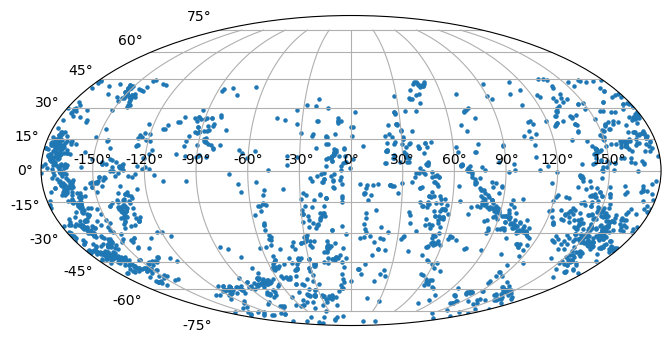

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(c.ra.wrap_at(180*u.degree).to(u.rad),c.dec.to(u.rad),s=5)
#ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
plt.show()

In [4]:
data_bright = data[(data['K_abs']<-23.2)&(data['K_abs']>-26.)]
print(data_bright)

data_faint = data[(data['K_abs']>-23.2)&(data['K_abs']<-22.)]
print(data_faint)


 _RAJ2000  _DEJ2000 Kcmag  Hcmag  Jcmag  ... W1mag  W2mag  W3mag  class
--------- --------- ------ ------ ------ ... ------ ------ ------ -----
189.99789 -11.62307  4.991  5.228  5.897 ...  7.227  7.215  6.317     3
187.44499   8.00041  5.498  5.732   6.37 ...   7.88  7.895  7.275     3
198.95554  42.02929  5.722  5.947  6.682 ...   8.35  8.307  5.845     3
 190.9167  11.55261  5.816  6.064   6.74 ...  7.857  7.892  7.137     3
  49.3275 -41.10807  5.847  6.093  6.731 ...  7.678  7.693  6.637     3
166.45247   -0.0359  5.848  6.094  6.781 ...  7.961  7.912  5.963     3
187.70593   12.3911  5.896  6.144  6.806 ...  8.214  8.147  6.933     3
151.30824  -7.71858  5.921  6.148   6.81 ...  7.313  7.343  6.628     3
339.26709  34.41592  6.081  6.332  7.077 ...  7.858  7.815  6.522     3
169.73315  13.09221  6.104  6.342  7.018 ...  8.558  8.576  7.359     3
      ...       ...    ...    ...    ... ...    ...    ...    ...   ...
 193.5218   -8.6211 10.465  10.67 11.275 ... 12.444 12.548 10.28

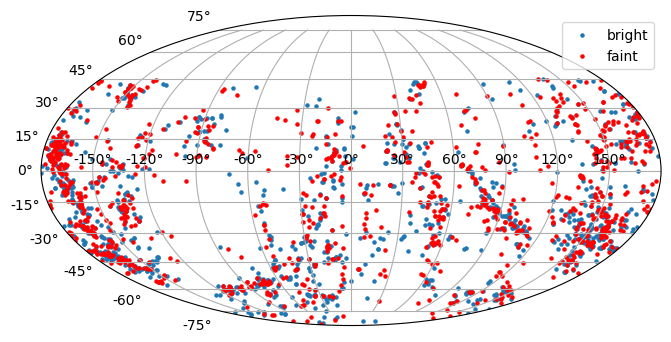

In [5]:
c_bright = SkyCoord(data_bright['_RAJ2000']*u.degree,data_bright['_DEJ2000']*u.degree,frame='icrs')
c_faint = SkyCoord(data_faint['_RAJ2000']*u.degree,data_faint['_DEJ2000']*u.degree,frame='icrs')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(c_bright.ra.wrap_at(180*u.degree).to(u.rad),c_bright.dec.to(u.rad),s=5,label='bright')
ax.scatter(c_faint.ra.wrap_at(180*u.degree).to(u.rad),c_faint.dec.to(u.rad),s=5,c='r',label='faint')
ax.legend()
ax.grid(True)
plt.show()

### Crear catálogo random para estas muestras

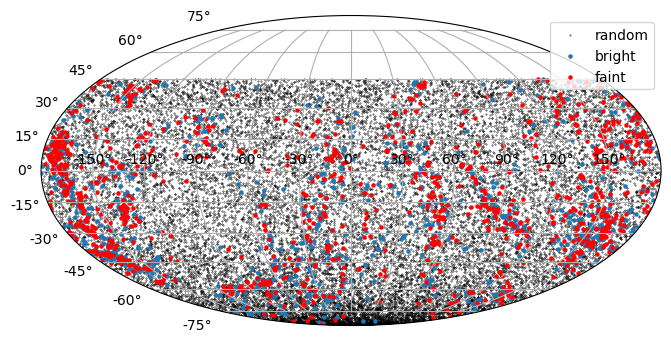

In [31]:
import numpy as np
#import plotly.graph_objects as go
import matplotlib.pyplot as plt

from numpy import sin, cos, pi, arccos, sqrt

nn = len(data)*10
# uu = np.random.rand(nn) 
# phi = arccos(1 - 2*uu) #inverse transform sampling 
# theta = 2*pi*np.random.rand(nn) #uniform sampling 

phi = np.random.uniform(low=-pi, high=pi, size=nn)
theta = np.random.uniform(low=-pi/2., high=pi/4., size=nn)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(phi,theta,s=.1,c='k',label='random')
ax.scatter(c_bright.ra.wrap_at(180*u.degree).to(u.rad),c_bright.dec.to(u.rad),s=5,label='bright')
ax.scatter(c_faint.ra.wrap_at(180*u.degree).to(u.rad),c_faint.dec.to(u.rad),s=5,c='r',label='faint')
ax.legend()
ax.grid(True)
plt.show()

### Quiero leer los archivos de Auger

In [ ]:
from astropy.io import ascii

filename = '../data/Auger/events_a8_lb.dat'
events_a8 = ascii.read(filename)
print(events_a8)

year day  dec    RA  azimuth weight      GAL_LONG            GAL_LAT      
---- --- ----- ----- ------- ------ ------------------ -------------------
2004   1 -11.8 208.9   164.7  1.004 326.81103912986305  48.074593802882035
2004   2 -70.4  36.6  -111.6 1.0001 291.98763785277043  -44.65587901531682
2004   3 -47.8 334.7  -143.8 0.9973  347.6950310559899  -53.88736247127606
2004   3 -22.1  87.2  -162.8  1.008 226.83295154733634  -23.21158189587835
2004   7  -5.8 178.6   162.7 1.0046  278.1018287831234   54.29886279081191
2004   9   3.4  60.5    82.9 1.0072 186.95030931259902 -34.858932268586734
2004  12   3.6 248.3   126.3 1.0007  19.10644111536092   32.17392461870225
2004  13 -27.2 301.8    11.6 0.9977 14.819215108866292 -27.733651740257223
2004  13 -30.0 177.9     4.2 0.9998 287.79675531125173  31.107037590712494
2004  14  16.5 273.7   145.0 1.0059 43.883818373551215   15.38734329858471
 ... ...   ...   ...     ...    ...                ...                 ...
2016 243 -75.6 150.5  -10

TypeError: Changing axes limits of a geographic projection is not supported.  Please consider using Cartopy.

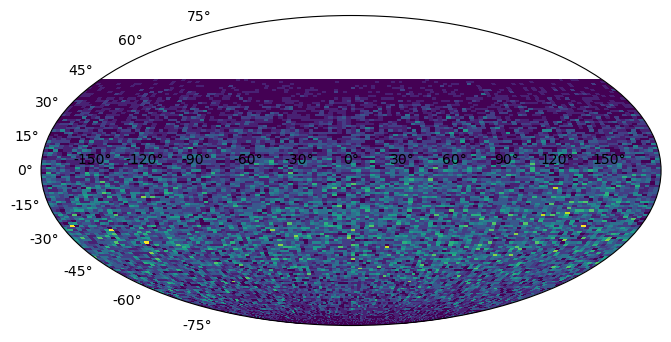

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

c_events = SkyCoord(events_a8['RA']*u.degree,events_a8['dec']*u.degree,frame='icrs')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='mollweide')

ax.hist2d(c_events.ra.wrap_at(180*u.degree).to(u.rad),c_events.dec.to(u.rad),bins=128)

ax.grid(True)
plt.show()

In [ ]:
c_events.dec.to(u.rad).max()

<Angle 0.78016218 rad>

In [ ]:
"""
Copiado de StackOverflow
"""

def IndexToDeclRa(index):
    theta,phi=hp.pixelfunc.pix2ang(NSIDE,index)
    return -np.degrees(theta-pi/2.),np.degrees(pi*2.-phi)

def DeclRaToIndex(decl,RA):
    return hp.pixelfunc.ang2pix(NSIDE,np.radians(-decl+90.),np.radians(360.-RA))

[29675 47841 42783 ... 34361 42690 42208]


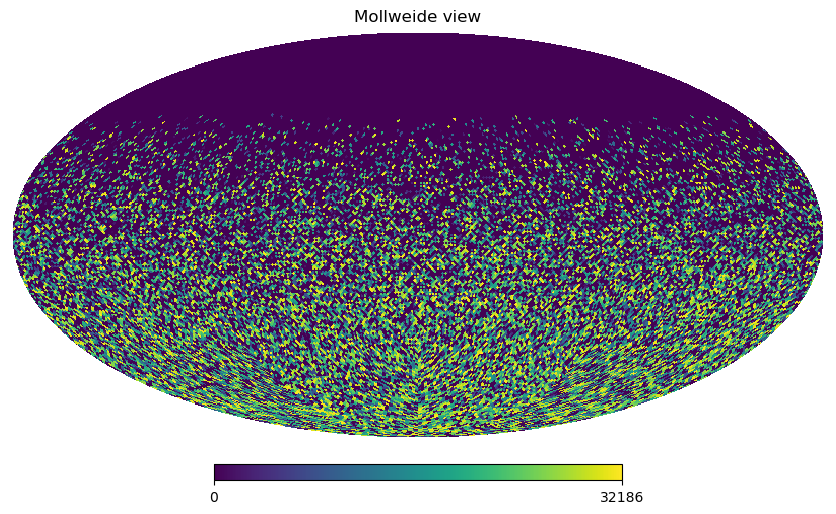

In [ ]:
import healpy as hp
import numpy as np
NSIDE=64
idx = DeclRaToIndex(events_a8['dec'].data,events_a8['RA'].data)
print(idx)


m = np.zeros(hp.nside2npix(NSIDE))
m[idx] = np.arange(len(events_a8))

hp.mollview(m)